In [63]:
%pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 2.4/150.0 MB 19.1 MB/s eta 0:00:08
   - -------------------------------------- 4.5/150.0 MB 12.8 MB/s eta 0:00:12
   - -------------------------------------- 5.5/150.0 MB 10.8 MB/s eta 0:00:14
   - -------------------------------------- 6.3/150.0 MB 9.2 MB/s eta 0:00:16
   -- ------------------------------------- 7.6/150.0 MB 7.7 MB/s eta 0:00:19
   -- ------------------------------------- 8.9/150.0 MB 7.4 MB/s eta 0:00:20
   -- ------------------------------------- 9.4/150.0 MB 6.7 MB/s eta 0:00:21
   -- ------------------------------------- 9.7/150.0 MB 6.0 MB/s eta 0:00:24
   -- ------------------------------------- 9.7/150.0 MB 6.0 MB/s eta 0:00:24
   -- ------------------------------------- 10.0/150.0 MB 5.1 MB/s eta 0:00:28
   -- ------------------------------------- 10.2/150.0 MB 4.7 MB/s eta 0:00:31
   -- ------------------------------------- 10.5/150.0 MB 4.3 MB/

In [1]:
%pip install "numpy<2.0"

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv("phishing.csv")

In [4]:
df.drop(columns='Index',inplace=True)

In [5]:
df.head(5)

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1


In [6]:
df.columns

Index(['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [7]:
df.nunique()

UsingIP                2
LongURL                3
ShortURL               2
Symbol@                2
Redirecting//          2
PrefixSuffix-          2
SubDomains             3
HTTPS                  3
DomainRegLen           2
Favicon                2
NonStdPort             2
HTTPSDomainURL         2
RequestURL             2
AnchorURL              3
LinksInScriptTags      3
ServerFormHandler      3
InfoEmail              2
AbnormalURL            2
WebsiteForwarding      2
StatusBarCust          2
DisableRightClick      2
UsingPopupWindow       2
IframeRedirection      2
AgeofDomain            2
DNSRecording           2
WebsiteTraffic         3
PageRank               2
GoogleIndex            2
LinksPointingToPage    3
StatsReport            2
class                  2
dtype: int64

In [8]:
columns_to_update = ['UsingIP','ShortURL', 'Symbol@', 'Redirecting//','PrefixSuffix-','DomainRegLen', 'Favicon','NonStdPort'
                     ,'HTTPSDomainURL','RequestURL','InfoEmail', 'AbnormalURL','WebsiteForwarding'
                     , 'StatusBarCust', 'DisableRightClick','UsingPopupWindow', 'IframeRedirection'
                     , 'AgeofDomain', 'DNSRecording','PageRank', 'GoogleIndex','StatsReport','class']

In [9]:
df[columns_to_update] = df[columns_to_update].replace(-1,0)

In [10]:
df.head(5)

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,1,1,1,1,1,0,0,1,0,1,...,1,1,0,0,0,0,1,1,1,0
1,1,0,1,1,1,0,-1,-1,0,1,...,1,1,1,0,1,0,1,0,0,0
2,1,0,1,1,1,0,-1,-1,1,1,...,1,1,0,0,1,0,1,-1,1,0
3,1,0,0,1,1,0,1,1,0,1,...,0,1,0,0,0,0,1,1,1,1
4,0,0,0,1,0,0,1,1,0,1,...,1,1,1,1,1,0,1,-1,0,1


In [11]:
df['class']

0        0
1        0
2        0
3        1
4        1
        ..
11049    1
11050    0
11051    0
11052    0
11053    0
Name: class, Length: 11054, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   UsingIP              11054 non-null  int64
 1   LongURL              11054 non-null  int64
 2   ShortURL             11054 non-null  int64
 3   Symbol@              11054 non-null  int64
 4   Redirecting//        11054 non-null  int64
 5   PrefixSuffix-        11054 non-null  int64
 6   SubDomains           11054 non-null  int64
 7   HTTPS                11054 non-null  int64
 8   DomainRegLen         11054 non-null  int64
 9   Favicon              11054 non-null  int64
 10  NonStdPort           11054 non-null  int64
 11  HTTPSDomainURL       11054 non-null  int64
 12  RequestURL           11054 non-null  int64
 13  AnchorURL            11054 non-null  int64
 14  LinksInScriptTags    11054 non-null  int64
 15  ServerFormHandler    11054 non-null  int64
 16  InfoEmail            1

In [13]:
df.shape

(11054, 31)

In [14]:
df.isnull().sum()

UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [15]:
df

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,1,1,1,1,1,0,0,1,0,1,...,1,1,0,0,0,0,1,1,1,0
1,1,0,1,1,1,0,-1,-1,0,1,...,1,1,1,0,1,0,1,0,0,0
2,1,0,1,1,1,0,-1,-1,1,1,...,1,1,0,0,1,0,1,-1,1,0
3,1,0,0,1,1,0,1,1,0,1,...,0,1,0,0,0,0,1,1,1,1
4,0,0,0,1,0,0,1,1,0,1,...,1,1,1,1,1,0,1,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,1,-1,1,0,1,1,1,1,0,0,...,0,0,1,1,-1,0,1,1,1,1
11050,0,1,1,0,0,0,1,-1,0,0,...,0,1,1,1,1,1,1,-1,1,0
11051,1,-1,1,1,1,0,1,-1,0,1,...,1,1,1,1,1,0,1,0,1,0
11052,0,-1,1,1,1,0,-1,-1,1,0,...,0,1,1,1,1,0,1,1,1,0


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop(columns='class')

In [16]:
y = df['class']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7406, 30)
(3648, 30)
(7406,)
(3648,)


In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
logistic_model = LogisticRegression(max_iter=1000)

In [21]:
logistic_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [22]:
logistic_y_pred = logistic_model.predict(X_test)

In [23]:
print("Accuracy for logistic_regression:",accuracy_score(y_test,logistic_y_pred))

Accuracy for logistic_regression: 0.9290021929824561


In [24]:
print("Confusion Matrix for logistic_regression:\n",confusion_matrix(y_test,logistic_y_pred))

Confusion Matrix for logistic_regression:
 [[1438  156]
 [ 103 1951]]


In [25]:
print("Classification Report for logistic_regression:\n\n",classification_report(y_test,logistic_y_pred))

Classification Report for logistic_regression:

               precision    recall  f1-score   support

           0       0.93      0.90      0.92      1594
           1       0.93      0.95      0.94      2054

    accuracy                           0.93      3648
   macro avg       0.93      0.93      0.93      3648
weighted avg       0.93      0.93      0.93      3648



In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
knn_y_pred = knn_model.predict(X_test)

In [29]:
print("Accuracy for k_neighbors_classfier:",accuracy_score(y_test,knn_y_pred))

Accuracy for k_neighbors_classfier: 0.9583333333333334


In [30]:
print("Confusion Matrix for k_neighbors_classfier:\n",confusion_matrix(y_test,knn_y_pred))

Confusion Matrix for k_neighbors_classfier:
 [[1496   98]
 [  54 2000]]


In [31]:
print("Classification Report for k_neighbors_classfier:\n\n",classification_report(y_test,knn_y_pred))

Classification Report for k_neighbors_classfier:

               precision    recall  f1-score   support

           0       0.97      0.94      0.95      1594
           1       0.95      0.97      0.96      2054

    accuracy                           0.96      3648
   macro avg       0.96      0.96      0.96      3648
weighted avg       0.96      0.96      0.96      3648



In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
decision_tree_y_pred = decision_tree_model.predict(X_test)

In [35]:
print("Accuracy for decision_tree_classfier:",accuracy_score(y_test,decision_tree_y_pred))

Accuracy for decision_tree_classfier: 0.9586074561403509


In [36]:
print("Confusion Matrix for decision_tree_classfier:\n",confusion_matrix(y_test,decision_tree_y_pred))

Confusion Matrix for decision_tree_classfier:
 [[1506   88]
 [  63 1991]]


In [37]:
print("Classification Report for decision_tree_classfier:\n\n",classification_report(y_test,decision_tree_y_pred))

Classification Report for decision_tree_classfier:

               precision    recall  f1-score   support

           0       0.96      0.94      0.95      1594
           1       0.96      0.97      0.96      2054

    accuracy                           0.96      3648
   macro avg       0.96      0.96      0.96      3648
weighted avg       0.96      0.96      0.96      3648



In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train,y_train)

RandomForestClassifier()

In [40]:
rfc_y_pred = random_forest_model.predict(X_test)

In [41]:
print("Accuracy for random_forest_classfier:",accuracy_score(y_test,rfc_y_pred))

Accuracy for random_forest_classfier: 0.9684758771929824


In [42]:
print("Confusion Matrix for random_forest_classfier:\n",confusion_matrix(y_test,rfc_y_pred))

Confusion Matrix for random_forest_classfier:
 [[1526   68]
 [  47 2007]]


In [43]:
print("Classification Report for random_forest_classfier:\n\n",classification_report(y_test,rfc_y_pred))

Classification Report for random_forest_classfier:

               precision    recall  f1-score   support

           0       0.97      0.96      0.96      1594
           1       0.97      0.98      0.97      2054

    accuracy                           0.97      3648
   macro avg       0.97      0.97      0.97      3648
weighted avg       0.97      0.97      0.97      3648



In [44]:
from sklearn.svm import SVC

In [45]:
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [46]:
svc_y_pred = svc_model.predict(X_test)

In [47]:
print("Accuracy for SVC_classfier:",accuracy_score(y_test,svc_y_pred))

Accuracy for SVC_classfier: 0.9476425438596491


In [48]:
print("Confusion Matrix for SVC_classfier:\n",confusion_matrix(y_test,svc_y_pred))

Confusion Matrix for SVC_classfier:
 [[1465  129]
 [  62 1992]]


In [49]:
print("Classification Report for SVC_classfier:\n\n",classification_report(y_test,svc_y_pred))

Classification Report for SVC_classfier:

               precision    recall  f1-score   support

           0       0.96      0.92      0.94      1594
           1       0.94      0.97      0.95      2054

    accuracy                           0.95      3648
   macro avg       0.95      0.94      0.95      3648
weighted avg       0.95      0.95      0.95      3648



In [50]:
from sklearn.ensemble import AdaBoostClassifier

In [51]:
ada_model = AdaBoostClassifier(n_estimators=5,learning_rate=1)
ada_model.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=5)

In [52]:
ada_y_pred = ada_model.predict(X_test)

In [53]:
print("Accuracy for AdaBoost_classfier:",accuracy_score(y_test,ada_y_pred))

Accuracy for AdaBoost_classfier: 0.9161184210526315


In [54]:
print("Confusion Matrix for AdaBoost_classfier:\n",confusion_matrix(y_test,ada_y_pred))

Confusion Matrix for AdaBoost_classfier:
 [[1419  175]
 [ 131 1923]]


In [55]:
print("Classification Report for AdaBoost_classfier:\n\n",classification_report(y_test,ada_y_pred))

Classification Report for AdaBoost_classfier:

               precision    recall  f1-score   support

           0       0.92      0.89      0.90      1594
           1       0.92      0.94      0.93      2054

    accuracy                           0.92      3648
   macro avg       0.92      0.91      0.91      3648
weighted avg       0.92      0.92      0.92      3648



In [56]:
from xgboost import XGBClassifier

In [57]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [58]:
xgb_y_pred = xgb_model.predict(X_test)

In [59]:
print("Accuracy for XGBoost_classfier:",accuracy_score(y_test,xgb_y_pred))

Accuracy for XGBoost_classfier: 0.9682017543859649


In [60]:
print("Confusion Matrix for XGBoost_classfier:\n",confusion_matrix(y_test,xgb_y_pred))

Confusion Matrix for XGBoost_classfier:
 [[1518   76]
 [  40 2014]]


In [61]:
print("Classification Report for XGBoost_classfier:\n\n",classification_report(y_test,xgb_y_pred))

Classification Report for XGBoost_classfier:

               precision    recall  f1-score   support

           0       0.97      0.95      0.96      1594
           1       0.96      0.98      0.97      2054

    accuracy                           0.97      3648
   macro avg       0.97      0.97      0.97      3648
weighted avg       0.97      0.97      0.97      3648



In [62]:
print("Classification Report for logistic_regression:\n\n",classification_report(y_test,logistic_y_pred))
print("- - - - - - - - - - -\n\nClassification Report for k_neighbors_classfier:\n\n",classification_report(y_test,knn_y_pred))
print("- - - - - - - - - - -\n\nClassification Report for decision_tree_classfier:\n\n",classification_report(y_test,decision_tree_y_pred))
print("- - - - - - - - - - -\n\nClassification Report for random_forest_classfier:\n\n",classification_report(y_test,rfc_y_pred))
print("- - - - - - - - - - -\n\nClassification Report for SVC_classfier:\n\n",classification_report(y_test,svc_y_pred))
print("- - - - - - - - - - -\n\nClassification Report for AdaBoost_classfier:\n\n",classification_report(y_test,ada_y_pred))
print("- - - - - - - - - - -\n\nClassification Report for XGBoost_classfier:\n\n",classification_report(y_test,xgb_y_pred))

Classification Report for logistic_regression:

               precision    recall  f1-score   support

           0       0.93      0.90      0.92      1594
           1       0.93      0.95      0.94      2054

    accuracy                           0.93      3648
   macro avg       0.93      0.93      0.93      3648
weighted avg       0.93      0.93      0.93      3648

- - - - - - - - - - -

Classification Report for k_neighbors_classfier:

               precision    recall  f1-score   support

           0       0.97      0.94      0.95      1594
           1       0.95      0.97      0.96      2054

    accuracy                           0.96      3648
   macro avg       0.96      0.96      0.96      3648
weighted avg       0.96      0.96      0.96      3648

- - - - - - - - - - -

Classification Report for decision_tree_classfier:

               precision    recall  f1-score   support

           0       0.96      0.94      0.95      1594
           1       0.96      0.97     

In [63]:
# Since we aim to minimise the false negatives and want high recall, therefore we choose RandomForest and XGBoost

In [64]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.6, 0.8, 1]
}

random_xgb = RandomizedSearchCV(XGBClassifier(), param_distributions=param_dist, 
                                scoring='recall', n_iter=20, cv=5)
random_xgb.fit(X_train, y_train)
print(random_xgb.best_params_)

{'subsample': 1, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.1, 'colsample_bytree': 0.6}


In [68]:
best_xgb = XGBClassifier(
    subsample=1,
    n_estimators=300,
    max_depth=9,
    learning_rate=0.1,
    colsample_bytree=0.6,
    use_label_encoder=False,
    eval_metric='logloss'
)

In [69]:
best_xgb.fit(X_train, y_train)

C:\Users\sujal\anaconda3\envs\requirements\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:33:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [70]:
best_xgb_y_pred = best_xgb.predict(X_test)

In [71]:
print("Accuracy:", accuracy_score(y_test, best_xgb_y_pred))

Accuracy: 0.9706688596491229


In [72]:
print("Confusion Matrix:\n", confusion_matrix(y_test, best_xgb_y_pred))

Confusion Matrix:
 [[1526   68]
 [  39 2015]]


In [73]:
print("Classification Report:\n", classification_report(y_test, best_xgb_y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1594
           1       0.97      0.98      0.97      2054

    accuracy                           0.97      3648
   macro avg       0.97      0.97      0.97      3648
weighted avg       0.97      0.97      0.97      3648



In [74]:
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'class_weight': ['balanced', None]
}

random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_dist,
    n_iter=30,
    scoring='recall',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search_rf.fit(X_train, y_train)
print("Best Parameters:", random_search_rf.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15, 'class_weight': None, 'bootstrap': False}


In [75]:
best_rf = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=10,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=15,
    class_weight=None,
    bootstrap=False,
    random_state=42
)

best_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=15, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [76]:
best_rf_y_pred = best_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, best_rf_y_pred))
print("\n\nConfusion Matrix:\n", confusion_matrix(y_test, best_rf_y_pred))
print("\n\nClassification Report:\n", classification_report(y_test, best_rf_y_pred))

Accuracy: 0.9643640350877193


Confusion Matrix:
 [[1514   80]
 [  50 2004]]


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      1594
           1       0.96      0.98      0.97      2054

    accuracy                           0.96      3648
   macro avg       0.96      0.96      0.96      3648
weighted avg       0.96      0.96      0.96      3648



In [77]:
#we will move forward with tuned xgboost model for phishing url classification

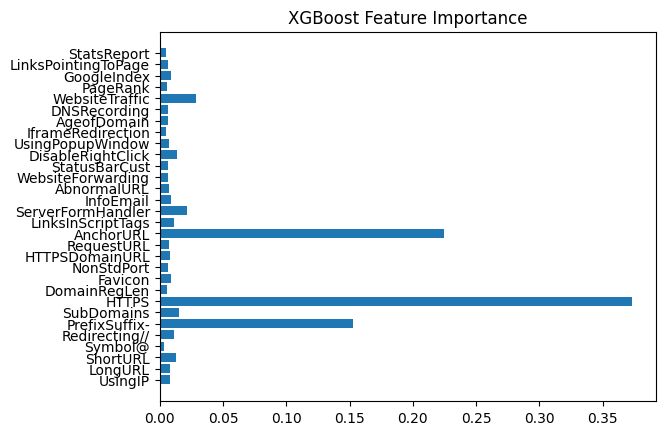

In [78]:
importances = best_xgb.feature_importances_
plt.barh(X.columns, importances)
plt.title("XGBoost Feature Importance")
plt.show()

In [79]:
#Since our recall is already 98%, we stick with all the features for now

In [80]:
import joblib
joblib.dump(best_xgb, "phishing_url_detector_xgb.pkl")

['phishing_url_detector_xgb.pkl']